In [1]:
# Start with our import of Tensorflow
import tensorflow as tf
import keras 
print(tf.__version__)

2.2.0


Using TensorFlow backend.


In [2]:
# The Fashion MNIST dataset is available directly in the tf.keras datasets API.
# Load it like this:-
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
# Calling load_data() on this object will give us two sets of two lists, these will be training and testing values
# for the graphics that contains the handwritten digits and their labels.

(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   2   1   0   0   0 

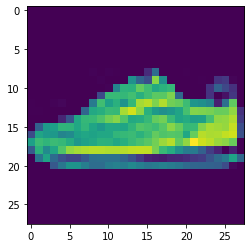

In [4]:
# Let's see how does these values look like ?
# We can also experiment and see different images in the array. Try out yourself... 
import matplotlib.pyplot as plt
plt.imshow(train_images[52])
print(train_labels[52])
print(train_images[52])

In [5]:
# You'll notice that all the values are between 0 and 255. If we are training a neural network, for various reasons
# it's easier if we treat all the values between 0 and 1 (a process called normalization), so we'll do exactly the same

train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# Let's now design the model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

In [7]:
# Now, we have to simply build the model. This is done by compiling it with an optimizer and a loss function
# and then we train it by calling 'model.fit()' asking it to fit our training data to our training labels
# This will take around a few seconds depending upon the number of epochs you're taking.
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
model.fit(x = train_images, y = train_labels, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 2s 838us/step - loss: 0.5004
Epoch 2/20
1875/1875 [==============================] - 2s 842us/step - loss: 0.3793
Epoch 3/20
1875/1875 [==============================] - 2s 839us/step - loss: 0.3383
Epoch 4/20
1875/1875 [==============================] - 1s 794us/step - loss: 0.3133
Epoch 5/20
1875/1875 [==============================] - 1s 775us/step - loss: 0.2976
Epoch 6/20
1875/1875 [==============================] - 1s 778us/step - loss: 0.2823
Epoch 7/20
1875/1875 [==============================] - 1s 779us/step - loss: 0.2697
Epoch 8/20
1875/1875 [==============================] - 1s 779us/step - loss: 0.2594
Epoch 9/20
1875/1875 [==============================] - 1s 779us/step - loss: 0.2511
Epoch 10/20
1875/1875 [==============================] - 2s 816us/step - loss: 0.2423
Epoch 11/20
1875/1875 [==============================] - 1s 785us/step - loss: 0.2339
Epoch 12/20
1875/1875 [==============================] - 1s 777

#### Once it's done, we see that our neural network gives a loss of about '0.2'. This tells us that the network gives an accuracy of about 80%. Not great but nor Bad considering the network was only trained for 10 epochs and done quite quickly.

#### But, how would it work with an unseen data ? Let's find out !!!

In [8]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 691us/step - loss: 0.3470


0.34697356820106506

#### As expected, the model gave an accuracy for about 66% i.e it didn't do well on the unseen data as it did on the training data. Now, try this out for yourself and see that by tweaking the parameters in the neural network or changing the number of epochs, if there's a way for you to get it above '66%' . Good luck with that, until next time... 